In [18]:
#Import the Python libraries and load customer data from the CSV file named “customer_data2.csv” into a pandas DataFrame called “customer_data”.   
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [23]:
#print out the table
customer_data=pd.read_csv('customer_data2.csv')
customer_data

,CustomerID,Age,AnnualIncome,SpendingScore
0,99,39,15000,30
1,100,41,35000,39
2,101,30,50000,81
3,102,23,20000,40
4,103,19,30000,30
5,104,21,40000,77
6,105,20,35000,40
7,106,23,20000,76
8,107,31,18000,35


In [4]:
#Display the first five rows of the DataFrame to get a quick overview of the data.
customer_data.head()


,CustomerID,Age,AnnualIncome,SpendingScore
0,99,39,15000,30
1,100,41,35000,39
2,101,30,50000,81
3,102,23,20000,40
4,103,19,30000,30


In [6]:
#To provide a summary of the DataFrame, including the data types of each column and the number of non-null values.
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     9 non-null      int64
 1   Age            9 non-null      int64
 2   AnnualIncome   9 non-null      int64
 3   SpendingScore  9 non-null      int64
dtypes: int64(4)
memory usage: 420.0 bytes


In [9]:
#Normalize the ‘AnnualIncome’ and ‘SpendingScore’ columns using Min-Max scaling.
scaler=MinMaxScaler()
scaler.fit(customer_data[['AnnualIncome','SpendingScore']])
customer_data[['AnnualIncome','SpendingScore']]=scaler.transform(customer_data[['AnnualIncome','SpendingScore']])
customer_data[['AnnualIncome','SpendingScore']]

,AnnualIncome,SpendingScore
0,0.000000,0.000000
1,0.571429,0.176471
2,1.000000,1.000000
3,0.142857,0.196078
4,0.428571,0.000000
5,0.714286,0.921569
6,0.571429,0.196078
7,0.142857,0.901961
8,0.085714,0.098039


<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

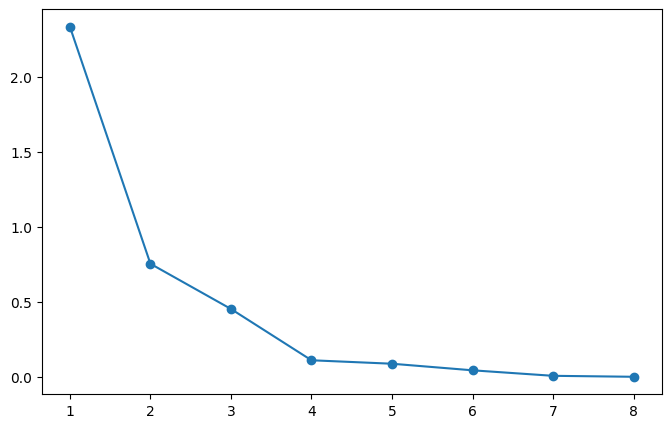

In [22]:
#Perform K-Means clustering on the data to find the optimal number of clusters using the elbow method.  
X=customer_data[['AnnualIncome','SpendingScore']]
values=[]
for k in range(1, 9):
    kmeans=KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    values.append(kmeans.inertia_)
    plt.figure(figsize=(8, 5))
plt.plot(range(1, 9), values, marker='o')